In [1]:
%cd ..
from notebooks import nb_utils
nb_utils.assert_cwd_is_bmeg()



/home/jovyan/work/bmeg_etl


In [2]:
from notebooks.graph_summarizer import summarize_graph, draw_summary

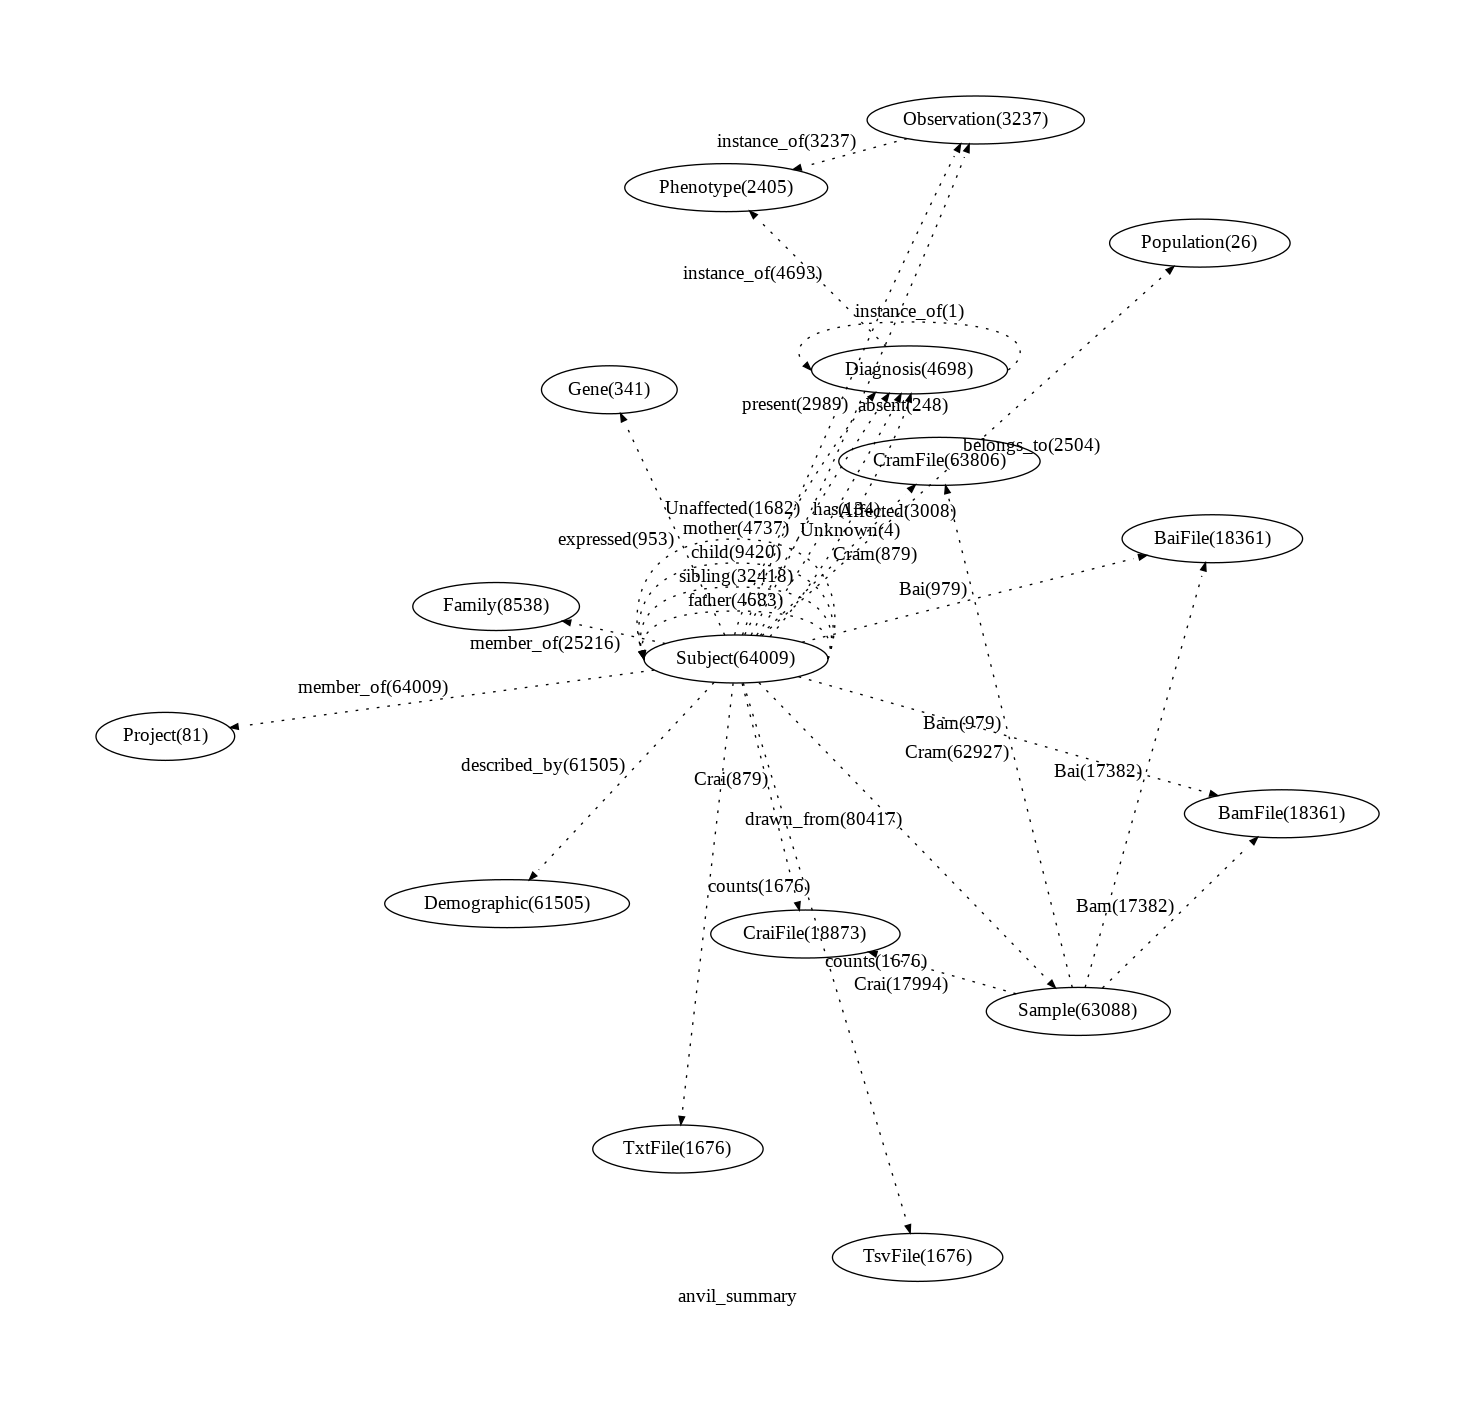

In [3]:
import json
import networkx as nx
from networkx.readwrite import json_graph, node_link_graph

with open('notebooks/ccdg_json.json') as input:
    ccdg = node_link_graph(json.load(input))
    
with open('notebooks/cmg_json.json') as input:
    cmg = node_link_graph(json.load(input))


with open('notebooks/1000g_json.json') as input:
    _1000g = node_link_graph(json.load(input))

with open('notebooks/gtex_json.json') as input:
    gtex = node_link_graph(json.load(input))
    
anvil =  nx.compose(_1000g,  nx.compose(nx.compose(cmg, ccdg), gtex)) 
draw_summary(summarize_graph(anvil), 'anvil_summary', prog='circo')

In [4]:
from collections import defaultdict
from pprint import pprint
graphs = [ccdg, cmg, _1000g, gtex]
sources = ['ccdg', 'cmg', '1000g', 'gtex']

source_counts = []
for t in zip(graphs, sources):
    graph = t[0]
    source = t[1]
    counts = defaultdict(int)
    for n in graph.nodes():
        label = graph.node[n]['label']
        counts[label] += 1
    counts['source'] = source
    source_counts.append(counts)

import pandas as pd
import numpy as np
pd.DataFrame.from_records(source_counts, index='source').replace(np.nan, '', regex=True)


,BaiFile,BamFile,CraiFile,CramFile,Demographic,Diagnosis,Family,Gene,Observation,Phenotype,Population,Project,Sample,Subject,TsvFile,TxtFile
source,,,,,,,,,,,,,,,,
ccdg,,,11762,54191,54302,4,4998,,,,,51,54302,54302,,
cmg,,,6232,6232,6224,4694,3540,341,3237,2406,,28,6228,6224,,
1000g,,,,2504,,,,,,,26,1,2504,2504,,
gtex,18361,18361,879,879,979,,,,,,,1,54,979,1676,1676
